In [50]:
# Load libraries
import pandas as pd
import numpy as np
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import itertools

# Function for Computing $\sin^2\theta_{i_k}$

Using the $\cos^2\theta_{i_k}$ function, we wrote a function that computes $\sin^2\theta_{i_k}$

$$\cos^2\theta_{i_k} = \frac{\langle a_{i_k}, a_{i_{k-1}} \rangle^2}{||a_{i_k}||^2||a_{i_{k-1}}||^2}$$

$$\sin^2\theta_{i_k} = 1 - \cos^2\theta_{i_k}$$

In [2]:
def compute_sin2(A):
    m, n = A.shape
    # compute numerator
    inner_p = A@np.transpose(A)
    num = inner_p[np.triu_indices(m, k = 1)]
    # compute denominator
    inner_p_dig = np.diagonal(inner_p)
    inner_p_dig = np.reshape(inner_p_dig, (m, 1))
    prod = inner_p_dig @ np.transpose(inner_p_dig)
    denom = prod[np.triu_indices(m, k = 1)]
    # compute sin2
    cos2 = num**2 / denom
    sin2 = 1 - cos2
    
    return sin2

In [48]:
A = np.random.randn(5000,500)
inner_p = A@np.transpose(A)
inner_p_dig = np.diagonal(inner_p)

# Gaussian System

In [3]:
# Generate System
A = np.random.randn(5000,500)
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [4]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)

(array([4.0000000e+00, 2.8000000e+01, 7.5000000e+01, 3.7800000e+02,
        1.7110000e+03, 8.0360000e+03, 3.7086000e+04, 1.8188400e+05,
        9.6811200e+05, 1.1300186e+07]),
 array([0.9445195 , 0.95006755, 0.9556156 , 0.96116365, 0.9667117 ,
        0.97225975, 0.9778078 , 0.98335585, 0.9889039 , 0.99445195,
        1.        ]),
 <BarContainer object of 10 artists>)

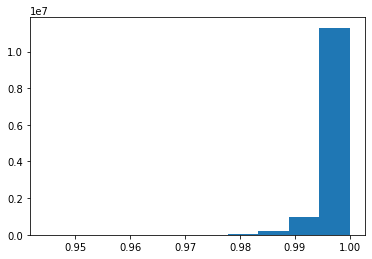

In [5]:
plt.hist(angles_g)

(array([  25.,  145.,  455., 1082., 1302., 1094.,  617.,  210.,   57.,
          13.]),
 array([398.39013463, 420.25859823, 442.12706182, 463.99552542,
        485.86398901, 507.73245261, 529.6009162 , 551.46937979,
        573.33784339, 595.20630698, 617.07477058]),
 <BarContainer object of 10 artists>)

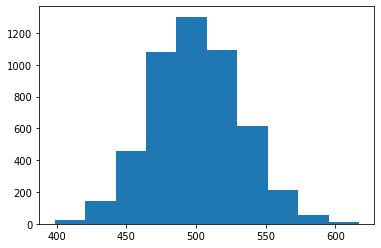

In [6]:
plt.hist(row_norm_g)

# Uniform System

In [7]:
# Generate System
A = np.random.uniform(low = 0, high = 1, size  = (5000,500))
x = np.ones(500)
y = A @ x

In [8]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_u = compute_sin2(A)
# Find the row norm
row_norm_u = np.sum(np.abs(A)**2,axis=-1)

(array([1.770000e+02, 1.219200e+04, 2.679370e+05, 1.907684e+06,
        4.695214e+06, 4.129126e+06, 1.321536e+06, 1.563700e+05,
        7.110000e+03, 1.540000e+02]),
 array([0.32814701, 0.35047456, 0.37280211, 0.39512966, 0.41745721,
        0.43978476, 0.46211231, 0.48443986, 0.50676741, 0.52909496,
        0.55142251]),
 <BarContainer object of 10 artists>)

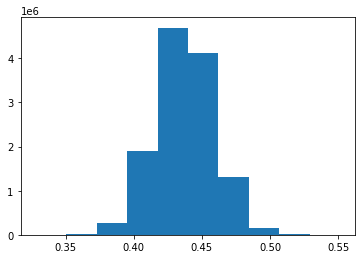

In [9]:
plt.hist(angles_u)

(array([   2.,    6.,   59.,  356., 1035., 1566., 1247.,  558.,  155.,
          16.]),
 array([136.29866698, 141.64708133, 146.99549569, 152.34391004,
        157.69232439, 163.04073874, 168.3891531 , 173.73756745,
        179.0859818 , 184.43439615, 189.78281051]),
 <BarContainer object of 10 artists>)

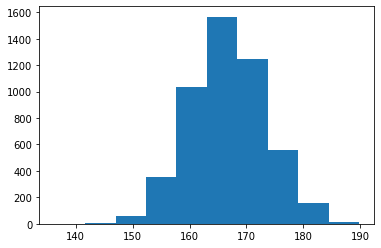

In [10]:
plt.hist(row_norm_u)

# Mixture Systems

## 50/50

In [11]:
# generate system
A1 = np.random.rand(2500,500)
A2 = np.random.uniform(low = 0, high = 1, size  = (2500,500))
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [12]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_gu1 = compute_sin2(A)
# Find the row norm
row_norm_gu1 = np.sum(np.abs(A)**2,axis=-1)

(array([6.800000e+01, 7.507000e+03, 2.054610e+05, 1.679485e+06,
        4.576400e+06, 4.345503e+06, 1.485592e+06, 1.877990e+05,
        9.472000e+03, 2.130000e+02]),
 array([0.32472761, 0.34727402, 0.36982042, 0.39236683, 0.41491323,
        0.43745964, 0.46000605, 0.48255245, 0.50509886, 0.52764526,
        0.55019167]),
 <BarContainer object of 10 artists>)

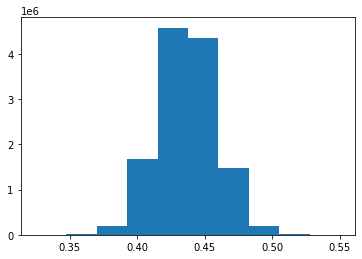

In [13]:
plt.hist(angles_gu1)

(array([  17.,   80.,  289.,  718., 1150., 1228.,  904.,  436.,  146.,
          32.]),
 array([144.25839539, 148.58801743, 152.91763947, 157.2472615 ,
        161.57688354, 165.90650558, 170.23612761, 174.56574965,
        178.89537169, 183.22499372, 187.55461576]),
 <BarContainer object of 10 artists>)

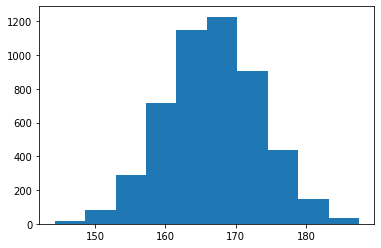

In [14]:
plt.hist(row_norm_gu1)

## 25/75

In [15]:
# generate system
A1 = np.random.rand(1250,500)
A2 = np.random.uniform(low = 0, high = 1, size  = (3750,500))
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [16]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_gu2 = compute_sin2(A)
# Find the row norm
row_norm_gu2 = np.sum(np.abs(A)**2,axis=-1)

(array([2.120000e+02, 1.384700e+04, 2.697510e+05, 1.808151e+06,
        4.441534e+06, 4.176515e+06, 1.546924e+06, 2.270740e+05,
        1.318500e+04, 3.070000e+02]),
 array([0.33030834, 0.35198546, 0.37366258, 0.3953397 , 0.41701682,
        0.43869394, 0.46037106, 0.48204818, 0.5037253 , 0.52540242,
        0.54707954]),
 <BarContainer object of 10 artists>)

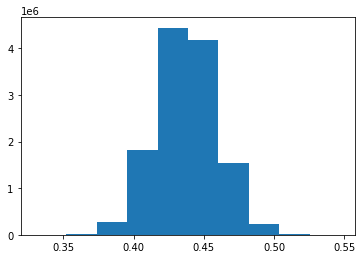

In [17]:
plt.hist(angles_gu2)

(array([1.500e+01, 1.200e+02, 4.630e+02, 1.064e+03, 1.501e+03, 1.159e+03,
        5.080e+02, 1.390e+02, 3.000e+01, 1.000e+00]),
 array([143.53844862, 148.57832054, 153.61819246, 158.65806439,
        163.69793631, 168.73780823, 173.77768015, 178.81755207,
        183.857424  , 188.89729592, 193.93716784]),
 <BarContainer object of 10 artists>)

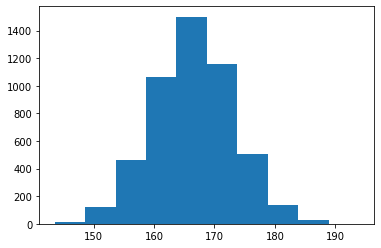

In [18]:
plt.hist(row_norm_gu2)

## 75/25

In [19]:
# generate system
A1 = np.random.rand(3750,500)
A2 = np.random.uniform(low = 0, high = 1, size  = (1250,500))
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [20]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_gu3 = compute_sin2(A)
# Find the row norm
row_norm_gu3 = np.sum(np.abs(A)**2,axis=-1)

(array([2.550000e+02, 1.693000e+04, 3.245450e+05, 2.060630e+06,
        4.678135e+06, 3.961464e+06, 1.285172e+06, 1.621560e+05,
        8.073000e+03, 1.400000e+02]),
 array([0.33070743, 0.35265174, 0.37459606, 0.39654037, 0.41848468,
        0.440429  , 0.46237331, 0.48431762, 0.50626193, 0.52820625,
        0.55015056]),
 <BarContainer object of 10 artists>)

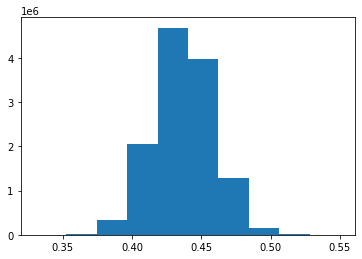

In [21]:
plt.hist(angles_gu3)

(array([  14.,   72.,  369.,  969., 1399., 1260.,  662.,  213.,   35.,
           7.]),
 array([142.68277694, 147.68804319, 152.69330943, 157.69857568,
        162.70384193, 167.70910818, 172.71437442, 177.71964067,
        182.72490692, 187.73017317, 192.73543941]),
 <BarContainer object of 10 artists>)

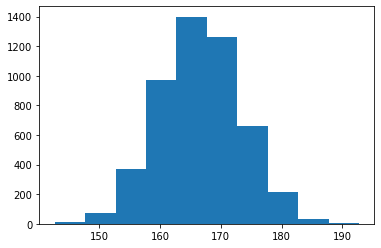

In [22]:
plt.hist(row_norm_gu3)

# 2 Highly Correlated Systems

In [23]:
# generate system
# Step 1: generate two gaussian linear system
A = np.random.randn(2,500)
A1 = np.reshape(A[0,:], (1, 500))
A2 = np.reshape(A[1,:], (1, 500))
# Step 2: generate correalted systems
U = np.random.uniform(low = 0, high = 1, size  = (2500,500))
A1 =  np.tile(A1, (2500, 1)) +  U
A2 =  np.tile(A2, (2500, 1)) +  U
# Step 3: Combine two correlated systems
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [24]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_corr = compute_sin2(A)
# Find the row norm
row_norm_corr = np.sum(np.abs(A)**2,axis=-1)

(array([6.247500e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        5.200000e+01, 6.249948e+06]),
 array([0.09125416, 0.17848359, 0.26571302, 0.35294246, 0.44017189,
        0.52740132, 0.61463076, 0.70186019, 0.78908962, 0.87631906,
        0.96354849]),
 <BarContainer object of 10 artists>)

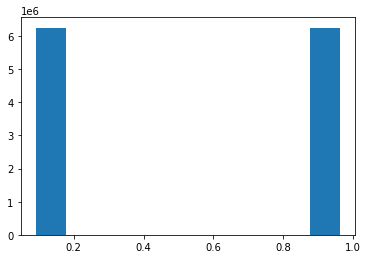

In [25]:
plt.hist(angles_corr)

(array([   3.,   36.,  235.,  642., 1212., 1352.,  961.,  425.,  117.,
          17.]),
 array([603.53514077, 614.79771695, 626.06029312, 637.32286929,
        648.58544547, 659.84802164, 671.11059781, 682.37317399,
        693.63575016, 704.89832633, 716.16090251]),
 <BarContainer object of 10 artists>)

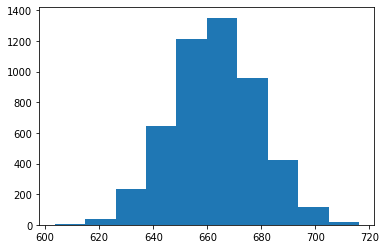

In [26]:
plt.hist(row_norm_corr)

# Results

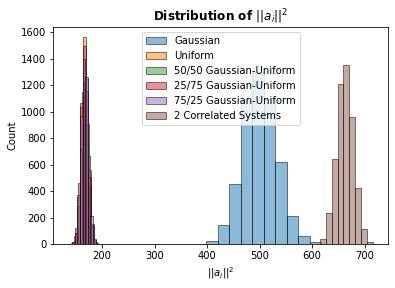

In [27]:
plt.hist(row_norm_g, label = "Gaussian",  alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_u, label = "Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_gu1, label = "50/50 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_gu2, label = "25/75 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_gu3, label = "75/25 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_corr, label = "2 Correlated Systems", alpha = 0.5, edgecolor = "black")
plt.ylabel('Count', fontsize = 10)
plt.xlabel('$||a_i||^2$', fontsize = 10)
plt.title('Distribution of $||a_i||^2$', fontweight="bold")
plt.legend()

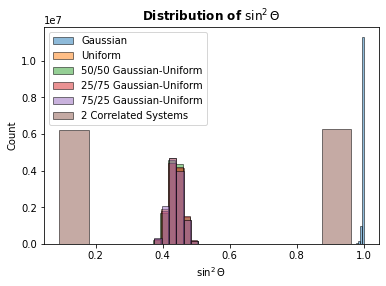

In [40]:
plt.hist(angles_g, label = "Gaussian",  alpha = 0.5, edgecolor = "black")
plt.hist(angles_u, label = "Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(angles_gu1, label = "50/50 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(angles_gu2, label = "25/75 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(angles_gu3, label = "75/25 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(angles_corr, label = "2 Correlated Systems", alpha = 0.5, edgecolor = "black")
plt.ylabel('Count', fontsize = 10)
plt.xlabel('$\sin^2\Theta$', fontsize = 10)
plt.title('Distribution of $\sin^2\Theta$', fontweight="bold")
plt.legend()